In [ ]:
!pip install basemap basemap-data-hires



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 42.5 MB/s eta 0:00:00


In [ ]:
 from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gp

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap

In [ ]:
file_path = '/content/drive/My Drive/Colab_Notebooks/Soil_moisture/data/'

In [ ]:
# Function to plot points
def draw_points(gdf, mpl_map, sizecol = None, color = 'red', alpha = 0.7, edgecolor = None, fill = True, cmap = None):
    '''
    Turns a geopandas gdf of points into matplotlib lat/lon objects for friendly plotting with basemap.
    '''
    lats = []
    lons = []
    for index, row in gdf.iterrows():
         for pt in list(row['geometry'].coords):
            lats.append(pt[1])
            lons.append(pt[0])

    if sizecol is None:
        sizecol = 0.006
    else:
        sizecol = sizecol.values

    m.scatter(lons, lats, latlon=True, s = sizecol, alpha=alpha, c = color, edgecolor = edgecolor, cmap = cmap, marker = 's')

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await 

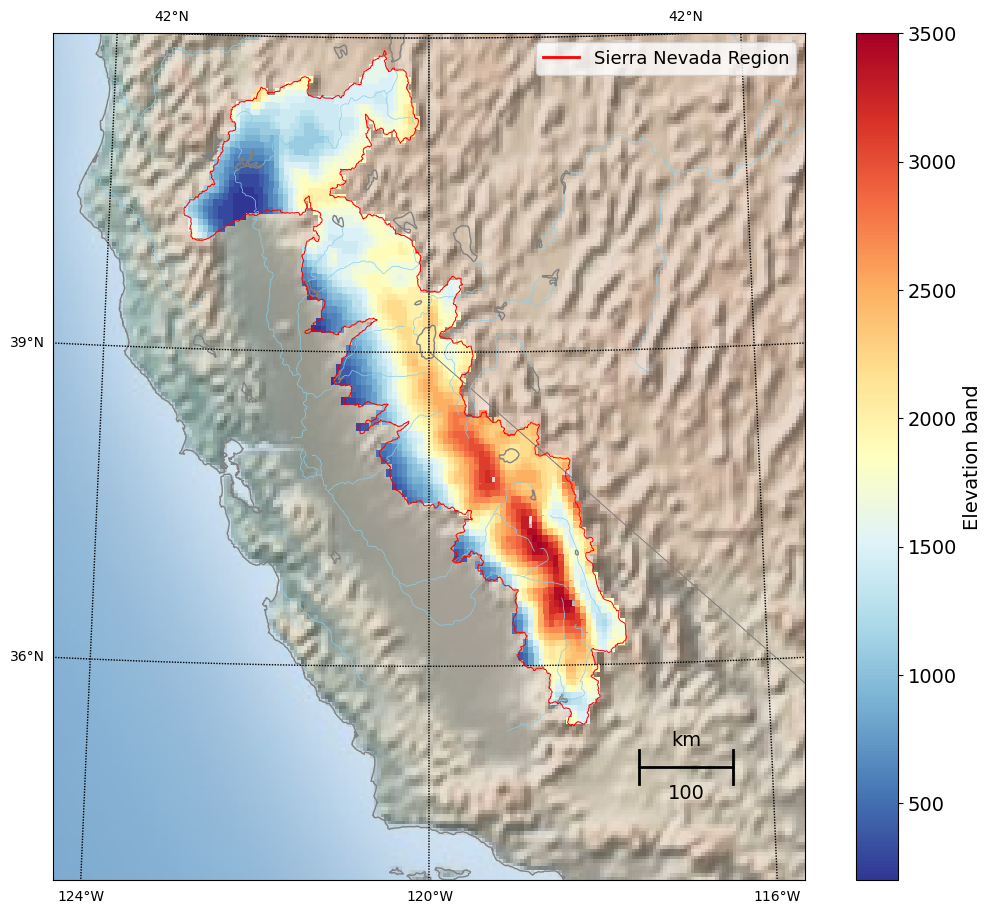

In [ ]:
# read the location shapefile
gdf_main = gp.read_file(file_path + "shape/Pixels_Catchment_ElevationBands.shp")
gdf_main['ElevBand_1'] = gdf_main['ElevBand_1']*100
gdf_main.crs = {'init': 'epsg:4326'}

# Read the boundary shapefile
boundary_gdf = gp.read_file(file_path + "shape/Sierra_reg_d.shp")
boundary_gdf.crs = {'init': 'epsg:4326'}

# Perform a spatial join to filter points within the boundary
gdf = gp.sjoin(gdf_main, boundary_gdf, how="inner", op='intersects')


# 1. Draw the map background
fig = plt.figure(figsize=(13, 11))

m = Basemap(projection='lcc', resolution='h', #lcc
            lat_0=38.0, lon_0=-120.0,
            width=0.8E6, height=0.9E6)

# Plot points
draw_points(gdf,m, alpha = 1, sizecol= (gdf["ElevBand_1"]/gdf["ElevBand_1"])*30,  color= gdf["ElevBand_1"], edgecolor = 'none', cmap = 'RdYlBu_r')

# Add elements to basemap
m.shadedrelief(zorder = 0)
# m.bluemarble()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawrivers(color = "skyblue")
# m.fillcontinents(color='none',lake_color='blue')

# Draw lines of latitude and longitude. Labels are like [left,right,top,bottom]
parallels = np.arange(0.,90.,3.)
meridians = np.arange(0.,360.,4.)

m.drawparallels(parallels,labels=[True,False,True,False]) # [left,right,top,bottom]
m.drawmeridians(meridians,labels=[True,False,False,True]) # [left,right,top,bottom]


# Plot region boundary
m.readshapefile((file_path + "shape/Sierra_reg_d"),'Sierra Nevada Region', drawbounds=True, linewidth=.7, color='r')
# m.readshapefile((idir_shp + "UCol_reg"),'Upper Colorado Region', drawbounds=True, linewidth=.7, color='b')


# Scalebar
m.drawmapscale(-117., 35.0,lon0=gdf_main.centroid.x[0], lat0=gdf_main.centroid.y[0], length = 100, fontsize = 14, linewidth = 2)

#====================================================
# Legend
#====================================================
# Make the first legend (upper right of map)
custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='blue', lw=2)
               ]
# Legend
# leg1 = plt.legend(custom_lines, ["Sierra Nevada Region", 'Upper Colorado Region'],
#                     loc = "upper right",
#                     prop={'size':13})
leg1 = plt.legend(custom_lines, ["Sierra Nevada Region"],
                    loc = "upper right",
                    prop={'size':13})


# Color bar
cbar = plt.colorbar(label='Elevation band')
# plt.clim(0, 1)
cbar.set_label(r"Elevation band", size=14)
# Color bar font size
cbar.ax.tick_params(labelsize=14)


# # Draw locations of USGS gages
# draw_points(gdf2,m, alpha = .9, sizecol= (gdf2["PeakSWE_Pr"]/gdf2["PeakSWE_Pr"])*10,  color= 'k', edgecolor = 'black')
# custom_lines2 = [Line2D([0], [0], linewidth=0, marker='o', markersize=2, markeredgecolor = 'k',markerfacecolor="k")
#                ]

# Legend
# leg2 = plt.legend(custom_lines2, ["USGS Gauge"],
#                     loc = "lower left",
#                     prop={'size':13})


# Add legends
# plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

plt.show()

In [ ]:
gdf.columns

Index(['GridID', 'Lat', 'Lon', 'Infilt', 'Ds', 'DsMax', 'Ws', 'c', 'Exp1',
       'Exp2', 'Exp3', 'Ksat1', 'Ksat2', 'Ksat3', 'Phi1', 'Phi2', 'Phi3',
       'init_moist', 'init_moi_1', 'init_mois', 'avg_elev', 'soilD1', 'soilD2',
       'soilD3', 'SoilT', 'SoilTempD', 'BubP1', 'BubP2', 'BubP3', 'BD1', 'BD2',
       'BD3', 'QCont1', 'QCont2', 'QCont3', 'SoilDen', 'GMT', 'SMWP1', 'SMWP2',
       'SMWP3', 'WP1', 'WP2', 'WP3', 'SR_Soil1', 'SR_Soil2', 'SR_Soil3',
       'SR_Snow', 'AvgPrecip', 'ResMois1', 'ResMois2', 'ResMois3', 'FS',
       'July_Temp', 'lat_lon', 'Name', 'ElevBand_1', 'ElevBand_2',
       'ElevBand_3', 'ElevBand_4', 'geometry', 'index_right', 'temp'],
      dtype='object')

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(9, 8))

m = Basemap(projection='lcc', resolution='l',
            lat_0=43.0, lon_0=-117,
            width=1.7E6, height=1.8E6)


draw_points(gdf,m, alpha = .9, sizecol= (gdf["PeakSWE_PrecipRatio"]/gdf["PeakSWE_PrecipRatio"])*100,  color= gdf["PeakSWE_PrecipRatio"], edgecolor = 'black', cmap = 'RdYlBu')

# Add elements to basemap
m.shadedrelief(zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
# m.drawrivers(color = "blue")
# m.fillcontinents(color='none',lake_color='blue')

# Draw lines of latitude and longitude. Labels are like [left,right,top,bottom]
parallels = np.arange(0.,90.,3.)
meridians = np.arange(0.,360.,3.)

m.drawparallels(parallels,labels=[True,False,True,False]) # [left,right,top,bottom]
m.drawmeridians(meridians,labels=[True,False,False,True]) # [left,right,top,bottom]

# Scalebar
m.drawmapscale(-111.5, 36.,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)


plt.colorbar(label='SWE/P')
plt.clim(0, 1)

plt.show()

KeyError: 'PeakSWE_PrecipRatio'

<Figure size 900x800 with 0 Axes>

In [ ]:
# read the location shapefile
geometry = [Point(xy) for xy in zip(df['LonGauge'], df['LatGauge'])]
gdf = gp.GeoDataFrame(df, geometry=geometry)

# Step 3: Set the CRS for the GeoDataFrame
gdf.crs = "EPSG:4326"  # This is the standard CRS for geographic coordinates

# 1. Draw the map background
fig = plt.figure(figsize=(13, 9))

m = Basemap(projection='lcc', resolution='l', #lcc
            lat_0=41.0, lon_0=-114.2,
            width=2.0E6, height=1.9E6)

# Plot points
draw_points(gdf,m, alpha = .9, sizecol= (gdf["PeakSWE_PrecipRatio"]/gdf["PeakSWE_PrecipRatio"])*100,  color= gdf["PeakSWE_PrecipRatio"], edgecolor = 'black', cmap = 'RdYlBu')

# Add elements to basemap
m.shadedrelief(zorder = 0)
# m.bluemarble()
m.drawcountries(color='gray')
m.drawstates(color='gray')

# m.fillcontinents(color='none',lake_color='blue')

# Draw lines of latitude and longitude. Labels are like [left,right,top,bottom]
parallels = np.arange(0.,90.,3.)
meridians = np.arange(0.,360.,4.)

m.drawparallels(parallels,labels=[True,False,True,False]) # [left,right,top,bottom]
m.drawmeridians(meridians,labels=[True,False,False,True]) # [left,right,top,bottom]


# Plot region boundary
m.readshapefile((file_path + "shape/Sierra_reg_d"),'Sierra Nevada Region', drawbounds=True, linewidth=.7, color='r')
# m.readshapefile((idir_shp + "shape/UCol_reg"),'Upper Colorado Region', drawbounds=True, linewidth=.7, color='b')


# Scalebar
m.drawmapscale(-106., 34.5,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)

#====================================================
# Legend
#====================================================
# Make the first legend (upper right of map)
custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='blue', lw=2)
               ]

# plt.legend(custom_lines, ["Sierra Nevada Region", 'Upper Colorado Region'],
#                     loc = "upper right",
#                     prop={'size':13})
plt.legend(custom_lines, ["Sierra Nevada Region"],
                    loc = "upper right",
                    prop={'size':13})

m.drawrivers(color = "skyblue")
m.drawcoastlines(color='gray')

# Color bar
cbar = plt.colorbar(label='SWE/P')
plt.clim(0, 1)
cbar.set_label(r"Peak SWE/Precipitation", size=14)
# Color bar font size
cbar.ax.tick_params(labelsize=14)

plt.show()